<a href="https://colab.research.google.com/github/KevinLopess/sistemas_inteligentes/blob/main/Trab2_SistemasInteligentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import genfromtxt
import pandas as pd
import numpy as np
import scipy.stats as stats
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download fedesoriano/stroke-prediction-dataset
! unzip stroke-prediction-dataset.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 22.7MB/s]
Archive:  stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
dataset = genfromtxt('healthcare-dataset-stroke-data.csv', delimiter=',' , skip_header=1 ,usecols=(-4,-10,-3))
dataset[np.isnan(dataset)] = 35
print(dataset[:10,:])
def MSE(y, y_test):
    mse = np.sum((y - y_pred)**2)/len(str(y))
    return mse
def MAE(true, pred):
  return np.mean(np.abs(true-pred))

[[228.69  67.    36.6 ]
 [202.21  61.    35.  ]
 [105.92  80.    32.5 ]
 [171.23  49.    34.4 ]
 [174.12  79.    24.  ]
 [186.21  81.    29.  ]
 [ 70.09  74.    27.4 ]
 [ 94.39  69.    22.8 ]
 [ 76.15  59.    35.  ]
 [ 58.57  78.    24.2 ]]


In [ ]:
X = np.array([dataset[:100,0],dataset[:100,1]]).T
Y = dataset[:100,2]
#w = np.array([0,0])
w = np.random.rand(2,)
#b = np.array([0])
b = np.random.rand(1,)
x_zscore = stats.zscore(X, axis=0)
w_hist = [w[0],w[1],b[0],100000,100000,100000]

p1 = 1000000
p2 = 1000000
p3 = 1000000

In [ ]:
learning_rate=0.001
err = 0

nb_of_iterations=100

for i in range(nb_of_iterations):
  errl = 0
  mse = 0
  mae = 0
  for x,y_true in zip(x_zscore,Y):
      #np.disp(x)
      #np.disp(y_true)
      #np.disp(x.shape)
      y_pred=np.dot(x,w)+b
      #np.disp(y_pred)
      err =(y_pred - y_true)
      #np.disp(err)
      delta_w = err * x
      delta_b = err
      #np.disp(delta_w)
      #np.disp(delta_b)
      w = w + learning_rate * (-delta_w) #atualização dos W
      b = b + learning_rate * (-delta_b) #atualização dos b
      errl = errl +(0.5*(err**2))
      mse = MSE(y_true,y_pred)
      mae = MAE(y_true,y_pred)
      a = np.array([w[0],w[1],b[0],errl[0],mse,mae])
  #np.disp(w)
  #np.disp(b)
  #np.disp(errl)
  w_hist = np.vstack((w_hist,a))
  print('int({}): w(0)={:.5f} | w(1)={:.5f} | b ={:.5f}\t --> cost: {:.5f} | MSE:{:.5f} | MAE:{:.5f}'.format(i, w[0], w[1], b[0], errl[0],mse,mae))

int(0): w(0)=0.92151 | w(1)=0.39382 | b =3.73978	 --> cost: 42923.14650 | MSE:156.47387 | MAE:25.01790
int(1): w(0)=0.95551 | w(1)=0.12092 | b =6.33181	 --> cost: 35383.82321 | MSE:126.45478 | MAE:22.49042
int(2): w(0)=0.98844 | w(1)=-0.12607 | b =8.67684	 --> cost: 29212.84006 | MSE:102.06684 | MAE:20.20563
int(3): w(0)=1.02018 | w(1)=-0.34963 | b =10.79839	 --> cost: 24161.84162 | MSE:82.26686 | MAE:18.14022
int(4): w(0)=1.05067 | w(1)=-0.55199 | b =12.71778	 --> cost: 20027.55171 | MSE:66.20369 | MAE:16.27313
int(5): w(0)=1.07985 | w(1)=-0.73519 | b =14.45425	 --> cost: 16643.59054 | MSE:53.18296 | MAE:14.58533
int(6): w(0)=1.10770 | w(1)=-0.90105 | b =16.02525	 --> cost: 13873.77727 | MSE:42.63831 | MAE:13.05960
int(7): w(0)=1.13420 | w(1)=-1.05121 | b =17.44654	 --> cost: 11606.64839 | MSE:34.10788 | MAE:11.68039
int(8): w(0)=1.15937 | w(1)=-1.18719 | b =18.73239	 --> cost: 9750.97122 | MSE:27.21513 | MAE:10.43362
int(9): w(0)=1.18322 | w(1)=-1.31033 | b =19.89570	 --> cost: 8232.

In [ ]:
menor_errl = np.argmin(w_hist,0)

In [ ]:
menor_errl

array([  0, 100,   0,  92,  31,  31])

In [ ]:

for j in range (nb_of_iterations+1):
  if w_hist[j][5] < MAE_Usavel:
    MAE_Usavel = w_hist[j][5]
    p1 = w_hist[j][0]
    p2  = w_hist[j][1]
    p3 = w_hist[j][2]

y_pred= X[:100,0]*p1+X[:100,1]*p2+p3

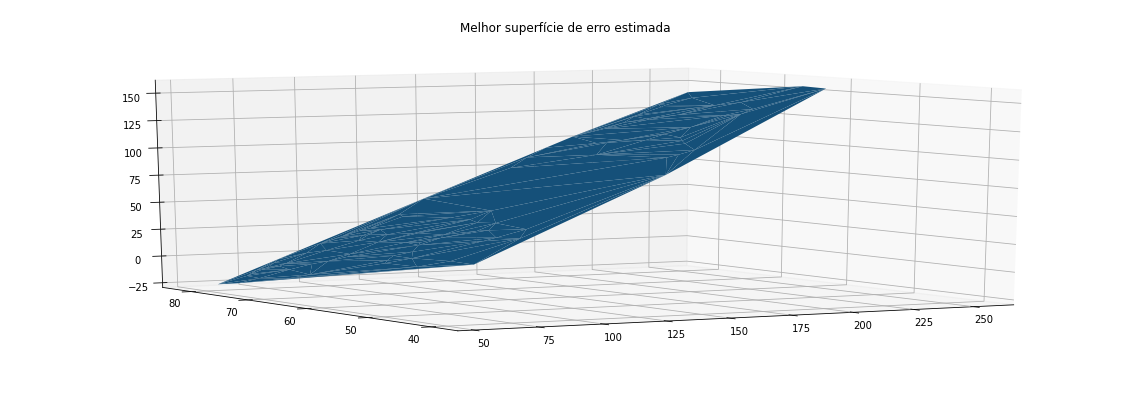

In [ ]:
# BLOCO DA SUPERFICIE COM MELHOR ERRO

fig = plt.figure(figsize=(20,7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(dataset[:100,0], dataset[:100,1], y_pred)

ax.view_init(elev=10, azim=-120)
plt.title ('Melhor superfície de erro estimada')
plt.show()

In [ ]:
points2D = np.vstack([dataset[:100,0],dataset[:100,1]]).T
from scipy.spatial import Delaunay

tri = Delaunay(points2D)
simplices = tri.simplices

import plotly.figure_factory as ff

fig = ff.create_trisurf(dataset[:100,0], dataset[:100,1], y_pred, simplices=simplices, aspectratio=dict(x=1, y=1, z=0.3),title='Melhor superfície de erro estimada')
fig.show()